# FMNIST Dataset

This notebook introduces training a Neural Network model in PyTroch using the Fashion MNIST dataset.

## Process of the Project
1. Prepare the data
2. Build the model
3. Train the model
4. Analyze the models results

#### Preparing the Data

E L T Process

**Extract** - Get the Dataset from the source

**Transform** - Put our data into tensor form

**Load** - Put our data into an object to make it easily accessible

<table class="table table-sm table-hover">
    <tbody>
        <tr>
            <th>
                Class
            </th>
            <th>
                Description
            </th>
        </tr>
        <tr>
            <td>
                torch.utils.data.Dataset
            </td>
            <td>
                An abstract class for representing a dataset.
            </td>
        </tr>      
        <tr>
            <td>
                torch.utils.data.DataLoader
            </td>
            <td>
                Wraps a dataset and provides access to the underlying data.
            </td>
        </tr>
    </tbody>
</table>

In [ ]:
#imports

import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
train_set = torchvision.datasets.FashionMNIST(
    root='./data/FashionMNIST',
    train=True,
    download=True,
    transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

In [ ]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size = 10)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
len(train_set)

60000

In [ ]:
train_set.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
train_set.targets.bincount()

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

The Dataset is Balanced. If the Dataset is not balanced there is said to be a "Class Imbalance"

From a resarch paper, the solution to deal with this problem for CNNs is to do "over sampling"

#####  Exploring the Dataset more

In [ ]:
sample = next(iter(train_set))

In [ ]:
len(sample)

2

In [ ]:
type(sample)

tuple

In [ ]:
image, label = sample

In [ ]:
image.shape

torch.Size([1, 28, 28])

label:  9


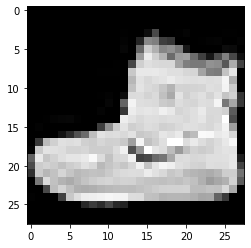

In [ ]:
plt.imshow(image.squeeze(), cmap = 'gray')
print('label: ', label)

In [ ]:
batch = next(iter(train_loader))

In [ ]:
len(batch)

2

In [ ]:
type(batch)

list

In [ ]:
images, labels = batch

In [ ]:
images.shape

torch.Size([10, 1, 28, 28])

In [ ]:
labels.shape

torch.Size([10])

labels:  tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


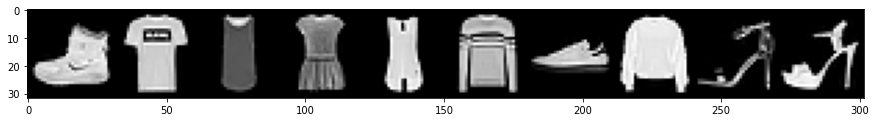

In [ ]:
grid = torchvision.utils.make_grid(images, nrow = 10)

plt.figure(figsize = (15,15))
plt.imshow(np.transpose(grid, (1,2,0)))

print('labels: ', labels)

#### Building the Model

* `torch.nn` subpackage contains modules and layers for building neural networks.
* All our models should extend the `torch.nn.Module` class.
* All the layers in the `torch.nn` package are subclasses of `torch.nn.Module` class

**The Forward Method**

The forward pass of a layer or neural network is defined by the Forward method. The composition of forward methods of all the layers defines the forward pass of the network itself.

So, every layer in the network needs to define its own forward method.

* `nn.functional` package has a lot of functions that aids while writing the forward pass of the network

**Summary**

1. Extend the `nn.Module` base class
2. Define layers as class attributes
3. Implement the `forward()` method



In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)

        self.fc1 = nn.Linear(in_features=12*4*4, out_features = 120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)

    def forward(self, t):
        return t

In [ ]:
network = Network()
network

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

**Learnable Parameters**

The parameters inside the layers are learnable paramters

All the weights are instances of the classs `Parameter` which is a subclass of `Tensor`. 

The nn.Module class looks for any attributes that are instances of the class `Paramter` and will automatically register them as learnable parameters. ( This could be found in the `__setattr__` method of the `Module` class )

**Callable Layers and Neural Networks**

The `nn.Moduke` class has a `__call__` method, so all the layers also inherit those functions. Making the classe callable.

```Python
fc = nn.Linear(in_features, out_features)

out = fc(t)
```

Under the hood the`__call__` calls the `forward` method, after doing some processing.

In [ ]:
network.conv1

Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))

In [ ]:
network.out

Linear(in_features=60, out_features=10, bias=True)

In [ ]:
network.conv1.weight
# The learnable weights
# These weights are chanegd to minimize the weights

Parameter containing:
tensor([[[[ 0.0531, -0.1690, -0.0038,  0.1396, -0.1436],
          [-0.0244, -0.0204, -0.0124,  0.1598,  0.0167],
          [-0.1231, -0.0482, -0.1688,  0.1623, -0.1756],
          [ 0.0222, -0.1269, -0.1538,  0.0397,  0.1147],
          [ 0.1488, -0.0449, -0.0429, -0.0056, -0.0754]]],


        [[[ 0.0055,  0.1645,  0.0808,  0.0149,  0.0042],
          [ 0.0009, -0.1287, -0.1931, -0.1500, -0.0732],
          [-0.0641, -0.1245,  0.1611, -0.0908,  0.1903],
          [ 0.0062,  0.1124, -0.0224, -0.0298, -0.0521],
          [ 0.1051, -0.1452,  0.1519,  0.1957,  0.0726]]],


        [[[ 0.1529, -0.0080,  0.0826, -0.0552, -0.1818],
          [-0.0973, -0.1169, -0.0211, -0.0418, -0.0079],
          [-0.1960, -0.0069,  0.1825,  0.0602, -0.1016],
          [ 0.1074,  0.1591,  0.0423,  0.0933,  0.1844],
          [ 0.0870, -0.0043,  0.0689, -0.0768, -0.1884]]],


        [[[ 0.1458,  0.1673,  0.1863, -0.1937,  0.0214],
          [ 0.1400,  0.0199, -0.0257,  0.1929, -0.0313

In [ ]:
network.conv1.weight.shape

torch.Size([6, 1, 5, 5])

In [ ]:
network.fc1.weight.shape

torch.Size([120, 192])

In [ ]:
## accessing all the parameters at once easily

for param in network.parameters():
    print(param.shape)

torch.Size([6, 1, 5, 5])
torch.Size([6])
torch.Size([12, 6, 5, 5])
torch.Size([12])
torch.Size([120, 192])
torch.Size([120])
torch.Size([60, 120])
torch.Size([60])
torch.Size([10, 60])
torch.Size([10])


In [ ]:
for name, param in network.named_parameters():
    print(name, '\t\t', param.shape)

conv1.weight 		 torch.Size([6, 1, 5, 5])
conv1.bias 		 torch.Size([6])
conv2.weight 		 torch.Size([12, 6, 5, 5])
conv2.bias 		 torch.Size([12])
fc1.weight 		 torch.Size([120, 192])
fc1.bias 		 torch.Size([120])
fc2.weight 		 torch.Size([60, 120])
fc2.bias 		 torch.Size([60])
out.weight 		 torch.Size([10, 60])
out.bias 		 torch.Size([10])


In [ ]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)

        self.fc1 = nn.Linear(in_features=12*4*4, out_features = 120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)

    def forward(self, t):
        # (1) input layer
        t = t

        # (2) hidden conv Layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size = 2, stride = 2)

        # (3) hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size = 2, stride = 2)

        # (4) hidden linear layer
        t = t.reshape(-1, 12 * 4 * 4)
        t = self.fc1(t)
        t = F.relu(t)

        # (5) hidden Linear layer
        t = self.fc2(t)
        t = F.relu(t)

        # (6) outout Layer
        t = self.out(t)
        #t = F.softmax(t, dim = 1) ( cross entropy loss will automatically calculate it )
        
        return t

**Forward Propagation**

Passing the data through the netwrok is called the forward Propagation

All the forward methods of layers expect a batch as an input

- For CNNs : `(batch_size, in_channels, height, width)`
- For Dense : `(batch_size, in_features)`

**Forwrd Propagation for an Image**

In [ ]:
# seeting the grdiant calculations off for now because we are just doing the forward propagation

torch.set_grad_enabled(False)

In [ ]:
network = Network()

In [ ]:
sample = next(iter(train_set))

In [ ]:
image, label = sample
image.shape

torch.Size([1, 28, 28])

In [ ]:
image.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [ ]:
pred = network(image.unsqueeze(0))

In [ ]:
pred.shape

torch.Size([1, 10])

In [ ]:
label

9

In [ ]:
pred.argmax(dim  = 1)

tensor([3])

In [ ]:
F.softmax(pred, dim = 1)

tensor([[0.0908, 0.1099, 0.0977, 0.1163, 0.0890, 0.0975, 0.0937, 0.0969, 0.1097,
         0.0985]])

In [ ]:
F.softmax(pred, dim = 1).sum()

tensor(1.0000)

**Forward Propagation for a Batch**

In [ ]:
batch = next(iter(train_loader))

In [ ]:
images, labels = batch

In [ ]:
images.shape

torch.Size([10, 1, 28, 28])

In [ ]:
labels.shape

torch.Size([10])

In [ ]:
preds = network(images)

In [ ]:
preds.shape

torch.Size([10, 10])

In [ ]:
preds

tensor([[-0.1014,  0.0893, -0.0277,  0.1458, -0.1209, -0.0299, -0.0704, -0.0368,
          0.0877, -0.0197],
        [-0.1085,  0.0980, -0.0179,  0.1457, -0.1141, -0.0330, -0.0636, -0.0289,
          0.0852, -0.0064],
        [-0.1077,  0.0984, -0.0186,  0.1426, -0.1079, -0.0158, -0.0603, -0.0355,
          0.0858, -0.0098],
        [-0.1039,  0.0995, -0.0204,  0.1449, -0.1074, -0.0219, -0.0606, -0.0353,
          0.0874, -0.0105],
        [-0.1023,  0.1033, -0.0289,  0.1552, -0.1124, -0.0280, -0.0647, -0.0360,
          0.0861, -0.0182],
        [-0.1054,  0.0914, -0.0192,  0.1470, -0.1123, -0.0233, -0.0625, -0.0326,
          0.0864, -0.0092],
        [-0.0991,  0.1014, -0.0240,  0.1374, -0.1141, -0.0218, -0.0615, -0.0235,
          0.0895, -0.0214],
        [-0.1000,  0.0921, -0.0195,  0.1451, -0.1120, -0.0270, -0.0581, -0.0302,
          0.0846, -0.0118],
        [-0.1063,  0.0918, -0.0172,  0.1366, -0.1082, -0.0159, -0.0576, -0.0233,
          0.0860, -0.0148],
        [-0.1026,  

In [ ]:
preds.argmax(dim = 1)

tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [ ]:
labels

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])

In [ ]:
def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

In [ ]:
get_num_correct(preds, labels)

1

**The output sizes of Conv Operations**

$$
O_{h} = \frac{n_{h} - f_{h} + 2p}{s} + 1
$$

$$
O_{w} = \frac{n_{w} - f_{w} + 2p}{s} + 1
$$

#### Training the Model

The Steps:

1. Get batch from the training set
2. Pass batch to network
3. Calculate the loss( difference between the predicted values and the true valeus )
4. Calculate the gradient of the loss function w.r.t the netwrok's weights
5. Update weights using the gradients to reduce the loss
6. Repeat steps 1-5 until one epoch is completed
7. Repeat steps 1-6 for as many epch required to obtain the desired leve of accuracy

In [ ]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

torch.set_grad_enabled(True)

##### Training with a single batch

**Calculating the Loss**

In [ ]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
batch = next(iter(train_loader))
images, labels = batch

In [ ]:
preds = network(images)
loss = F.cross_entropy(preds, labels)
loss.item()

2.3015053272247314

**Calculating the Gradients**

In [ ]:
print(network.conv1.weight.grad)

None


In [ ]:
loss.backward() # calculating the gradients

In [ ]:
network.conv1.weight.grad.shape

torch.Size([6, 1, 5, 5])

In [ ]:
optimizer = optim.Adam(network.parameters(), lr = 0.01)

In [ ]:
get_num_correct(preds, labels)

15

In [ ]:
optimizer.step() # Update the weights

In [ ]:
preds = network(images)
loss = F.cross_entropy(preds, labels)

In [ ]:
loss.item()

2.270522356033325

In [ ]:
get_num_correct(preds, labels)

15

**Summary**

In [ ]:
network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size =100)
optimizer = optim.Adam(network.parameters(), lr = 0.01)

batch = next(iter(train_loader)) # Get Batch
images, labels = batch

preds = network(images) # Pass Batch
loss = F.cross_entropy(preds, labels) # Caculate Loss

loss.backward() #Calculate Gradients
optimizer.step() # Update Weights


# ---------------------------------------------------

print('loss1:', loss.item())
preds = network(images)
loss = F.cross_entropy(preds, labels)
print('loss2:', loss.item())



loss1: 2.3146779537200928
loss2: 2.2821033000946045


##### Training for a single Epoch

In [ ]:
network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size =100)
optimizer = optim.Adam(network.parameters(), lr = 0.01)

total_loss = 0
total_correct = 0

for batch in train_loader:
    images, labels = batch

    preds = network(images) # Pass Batch
    loss = F.cross_entropy(preds, labels) # Caculate Loss

    optimizer.zero_grad() # PyTorch by default adds the gradients to the already existing ones, so zerp out any exisitng gradients
    loss.backward() #Calculate Gradients
    optimizer.step() # Update Weights

    total_loss += loss.item()
    total_correct += get_num_correct(preds, labels)

print("epoch:", 0, "total_correct:", total_correct, "loss:", total_loss)


epoch: 0 total_correct: 47232 loss: 336.47461691498756


In [ ]:
total_correct / len(train_set)

0.7872

##### Training with Multiple Epochs

In [ ]:
network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size =100)
optimizer = optim.Adam(network.parameters(), lr = 0.01)

num_epochs = 5

for epoch in range(num_epochs): 
    total_loss = 0
    total_correct = 0

    for batch in train_loader:
        images, labels = batch

        preds = network(images) # Pass Batch
        loss = F.cross_entropy(preds, labels) # Caculate Loss

        optimizer.zero_grad() # PyTorch by default adds the gradients to the already existing ones, so zerp out any exisitng gradients
        loss.backward() #Calculate Gradients
        optimizer.step() # Update Weights

        total_loss += loss.item()
        total_correct += get_num_correct(preds, labels)

    print("epoch:", epoch, "total_correct:", total_correct, "loss:", total_loss)


epoch: 0 total_correct: 46760 loss: 349.2267535626888
epoch: 1 total_correct: 51260 loss: 234.899080067873
epoch: 2 total_correct: 51992 loss: 215.29792653024197
epoch: 3 total_correct: 52299 loss: 208.4674174040556
epoch: 4 total_correct: 52523 loss: 201.89981785416603


#### Analyzing the results of model

While Predicting the results of the model, we need not keep track of the computation graph. 

This saves some memory and also makes the prediction fucntion run faster.

These are the ways to do this:

1. **Global Change** ( Not recommended )

```Python
torch.set_grad_enabled(False) # Turn off
torch.set_grad_enabled(True) # Turn on
```

2. **With Context manager** ( recommended )

```Python
with torch.no_grad():
    #do the predictions here
```

3. **With a decorator**

```Python
@torch.no_grad()
def predict():
    # write the prediction function here
```

**Building and Plotting the confusion matrix**

**Getting predictions for the entire training set**

In [ ]:
def get_all_preds(model, loader):
    all_preds = torch.tensor([])
    for batch in loader:
        images, labels = batch

        preds = model(images)
        all_preds = torch.cat(
            (all_preds, preds), dim = 0
        )
    return all_preds

In [ ]:
prediction_loader = torch.utils.data.DataLoader(train_set, batch_size = 10000)
train_preds = get_all_preds(network, prediction_loader)

In [ ]:
train_preds.shape

torch.Size([60000, 10])

In [ ]:
print(train_preds.requires_grad)
# see that the train_preds required grad is set to true

True


In [ ]:
train_preds.grad
# But there is no grad because `backward` is not called

/home/joel/anaconda3/envs/dl/lib/python3.9/site-packages/torch/_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  /opt/conda/conda-bld/pytorch_1640811723911/work/build/aten/src/ATen/core/TensorBody.h:417.)
  return self._grad


In [ ]:
train_preds.grad_fn
# The computaion graph is gettting stored

In [ ]:
with torch.no_grad():
    prediction_loader = torch.utils.data.DataLoader(train_set, batch_size = 10000)
    train_preds = get_all_preds(network, prediction_loader)

In [ ]:
print(train_preds.requires_grad)
# see that the required grad is set to false

False


In [ ]:
preds_correct = get_num_correct(train_preds, train_set.targets)

print('total_correct:', preds_correct)
print('accuracy:', preds_correct / len(train_set))

total_correct: 52919
accuracy: 0.8819833333333333


##### Building Confusion Matrix

In [ ]:
train_set.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
train_preds.argmax(dim = 1)

tensor([9, 0, 3,  ..., 3, 0, 5])

In [ ]:

stacked = torch.stack(
    (
    train_set.targets, 
    train_preds.argmax(dim = 1)
    ),
    dim = 1
)

In [ ]:
stacked.shape

torch.Size([60000, 2])

In [ ]:
stacked

tensor([[9, 9],
        [0, 0],
        [0, 3],
        ...,
        [3, 3],
        [0, 0],
        [5, 5]])

In [ ]:
stacked[0].tolist()

[9, 9]

In [ ]:
cmt = torch.zeros((10, 10), dtype = torch.int64)
cmt

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
for p in stacked:
    tl, pl = p.tolist()
    cmt[tl, pl] = cmt[tl, pl] + 1

In [ ]:
cmt

tensor([[5359,    8,   54,  170,   19,    7,  346,    1,   35,    1],
        [  22, 5820,   11,  112,    6,    5,   16,    0,    8,    0],
        [  84,    2, 4565,   68,  933,    1,  293,    0,   54,    0],
        [ 176,   25,   21, 5420,  207,    9,  132,    1,    8,    1],
        [  14,    6,  260,  183, 5293,    2,  224,    0,   18,    0],
        [   0,    0,    0,    0,    0, 5785,    0,  153,    1,   61],
        [1183,    7,  495,  132,  727,    3, 3364,    0,   89,    0],
        [   0,    0,    0,    0,    0,   48,    0, 5810,    1,  141],
        [  34,    1,   26,   15,   32,   75,   22,   20, 5773,    2],
        [   0,    0,    0,    0,    0,   23,    0,  242,    5, 5730]])

#### Final Code

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

torch.set_grad_enabled(True)

from torch.utils.tensorboard import SummaryWriter

In [2]:
def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

In [3]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)

        self.fc1 = nn.Linear(in_features=12*4*4, out_features = 120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)

    def forward(self, t):
        # (1) input layer
        t = t

        # (2) hidden conv Layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size = 2, stride = 2)

        # (3) hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size = 2, stride = 2)

        # (4) hidden linear layer
        t = t.reshape(-1, 12 * 4 * 4)
        t = self.fc1(t)
        t = F.relu(t)

        # (5) hidden Linear layer
        t = self.fc2(t)
        t = F.relu(t)

        # (6) outout Layer
        t = self.out(t)
        #t = F.softmax(t, dim = 1) ( cross entropy loss will automatically calculate it )
        
        return t

In [4]:
train_set = torchvision.datasets.FashionMNIST(
    root='./data/FashionMNIST',
    train=True,
    download=True,
    transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

In [5]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size = 100, shuffle=True)

In [ ]:
network = Network()
optimizer = optim.Adam(network.parameters(), lr = 0.01)

num_epochs = 1

for epoch in range(num_epochs): 
    total_loss = 0
    total_correct = 0

    for batch in train_loader:
        images, labels = batch

        preds = network(images) # Pass Batch
        loss = F.cross_entropy(preds, labels) # Caculate Loss

        optimizer.zero_grad() # PyTorch by default adds the gradients to the already existing ones, so zerp out any exisitng gradients
        loss.backward() #Calculate Gradients
        optimizer.step() # Update Weights

        total_loss += loss.item()
        total_correct += get_num_correct(preds, labels)

    print("epoch:", epoch, "total_correct:", total_correct, "loss:", total_loss)


epoch: 0 total_correct: 47117 loss: 341.0011550337076


#### Tensorboard and Hyper Parameter tuning

In [ ]:
tb = SummaryWriter()

network = Network()
images, labels = next(iter(train_loader))
grid = torchvision.utils.make_grid(images)

tb.add_image('images', grid)
tb.add_graph(network, images)
tb.close()

**Updating the Training Loop with Tensorboard**

In [ ]:
network = Network()
optimizer = optim.Adam(network.parameters(), lr = 0.01)

# Tb code
tb = SummaryWriter()
tb.add_image('images', grid)
tb.add_graph(network, images)


num_epochs = 10

for epoch in range(num_epochs): 
    total_loss = 0
    total_correct = 0

    for batch in train_loader:
        images, labels = batch

        preds = network(images) # Pass Batch
        loss = F.cross_entropy(preds, labels) # Caculate Loss

        optimizer.zero_grad() # PyTorch by default adds the gradients to the already existing ones, so zerp out any exisitng gradients
        loss.backward() #Calculate Gradients
        optimizer.step() # Update Weights

        total_loss += loss.item()
        total_correct += get_num_correct(preds, labels)
    
    tb.add_scalar('Loss', total_loss, epoch)
    tb.add_scalar('Number correct', total_correct, epoch)
    tb.add_scalar('Accuracy', total_correct / len(train_set), epoch)

    # tb.add_histogram('conv1.bias', network.conv1.bias, epoch)
    # tb.add_histogram('conv1.weight', network.conv1.weight, epoch)
    # tb.add_histogram('conv1.weight.grad', network.conv1.weight.grad, epoch)

    for name, weight in network.named_parameters():
        tb.add_histogram(name, weight, epoch )
        tb.add_histogram(f'{name}.grad', weight.grad, epoch)


    print("epoch:", epoch, "total_correct:", total_correct, "loss:", total_loss)

tb.close()

epoch: 0 total_correct: 46073 loss: 364.77777674794197
epoch: 1 total_correct: 50972 loss: 243.1044987589121
epoch: 2 total_correct: 51822 loss: 222.77563259005547
epoch: 3 total_correct: 51962 loss: 213.78359007835388
epoch: 4 total_correct: 52412 loss: 204.001144900918
epoch: 5 total_correct: 52472 loss: 201.9144280999899
epoch: 6 total_correct: 52463 loss: 201.24349734187126
epoch: 7 total_correct: 52746 loss: 195.9503139257431
epoch: 8 total_correct: 52839 loss: 192.48156744241714
epoch: 9 total_correct: 52800 loss: 193.28501443564892


**Hyper Parameter Tuning with Tensorboard**

In [ ]:
batch_size_list = [100, 1000, 10000]
lr_list = [.01, .001, .0001]

In [ ]:
# The hyper paramaters

for batch_size in batch_size_list:
    for lr in lr_list:

        network = Network()
        optimizer = optim.Adam(network.parameters(), lr = 0.01)

        # Pass a comment to the Summary Writer Object to uniqely identify the run

        comment = f' batch_size={batch_size} lr={lr}'
        tb = SummaryWriter(comment = comment)
        tb.add_image('images', grid)
        tb.add_graph(network, images)


        num_epochs = 10

        for epoch in range(num_epochs): 
            total_loss = 0
            total_correct = 0

            for batch in train_loader:
                images, labels = batch

                preds = network(images) # Pass Batch
                loss = F.cross_entropy(preds, labels) # Caculate Loss

                optimizer.zero_grad() # PyTorch by default adds the gradients to the already existing ones, so zerp out any exisitng gradients
                loss.backward() #Calculate Gradients
                optimizer.step() # Update Weights

                total_loss += loss.item()
                total_correct += get_num_correct(preds, labels)
            
            tb.add_scalar('Loss', total_loss, epoch)
            tb.add_scalar('Number correct', total_correct, epoch)
            tb.add_scalar('Accuracy', total_correct / len(train_set), epoch)

            # tb.add_histogram('conv1.bias', network.conv1.bias, epoch)
            # tb.add_histogram('conv1.weight', network.conv1.weight, epoch)
            # tb.add_histogram('conv1.weight.grad', network.conv1.weight.grad, epoch)

            for name, weight in network.named_parameters():
                tb.add_histogram(name, weight, epoch )
                tb.add_histogram(f'{name}.grad', weight.grad, epoch)


            print("epoch:", epoch, "total_correct:", total_correct, "loss:", total_loss)

        tb.close()

**Building the Run builder class**

Making the above process sophesticated

In [ ]:
from collections import OrderedDict
from collections import namedtuple
from itertools import product

In [ ]:
params = OrderedDict(
    lr = [.01, .001],
    batch_size = [1000, 10000]
)

In [ ]:
class RunBuilder():
    @staticmethod
    def get_runs(params):
        Run = namedtuple('Run', params.keys())

        runs = []

        for v in product(*params.values()):
            runs.append(Run(*v))

        return runs

In [ ]:
runs = RunBuilder.get_runs(params)
runs

[Run(lr=0.01, batch_size=1000),
 Run(lr=0.01, batch_size=10000),
 Run(lr=0.001, batch_size=1000),
 Run(lr=0.001, batch_size=10000)]

In [ ]:
runs[0]

Run(lr=0.01, batch_size=1000)

In [ ]:
runs[0].lr, runs[0].batch_size

(0.01, 1000)

**Making the Training Loop look better**

In [ ]:
import time
import json

In [ ]:
class RunManager():
    def __init__(self):

        self.epoch_count = 0
        self.epoch_loss = 0
        self.epoch_num_correct = 0
        self.epoch_start_time = 0
        
        self.run_params = None
        self.run_count = 0 # Run number
        self.run_data = [] # For every epoch add some info
        self.run_start_time = None

        self.network = None
        self.loader = None
        self.tb = None
    
    def begin_run(self, run, netowrk, loader):
        self.run_start_time = time.time()

        self.run_params = run
        self.run_count += 1

        self.network = network
        self.loader = loader
        self.tb = SummaryWriter(comment = f'-{run}')

        images, labels = next(iter(self.loader))
        grid = torchvision.utils.make_grid(images)

        self.tb.add_image('images', grid)
        self.tb.add_graph(self.network, images.to(getattr(run, 'device', 'cpu')))

    def end_run(self):
        self.tb.close()
        self.epoch_count = 0
    
    def begin_epoch(self):
        self.epoch_start_time = time.time()
        
        self.epoch_count += 1
        self.epoch_loss = 0
        self.epoch_num_correct = 0

    def end_epoch(self):

        epoch_duration = time.time() - self.epoch_start_time
        run_duration = time.time() - self.run_start_time

        loss = self.epoch_loss / len(self.loader.dataset)
        accuracy = self.epoch_num_correct / len(self.loader.dataset)

        tb.add_scalar('Loss', loss, self.epoch_count)
        tb.add_scalar('Accuracy', accuracy, self.epoch_count)


        for name, weight in self.network.named_parameters():
            tb.add_histogram(name, weight, self.epoch_count )
            tb.add_histogram(f'{name}.grad', weight.grad, self.epoch_count)
        
        results = OrderedDict()
        results['run'] = self.run_count
        results['epoch'] = self.run_count
        results['loss'] = loss
        results['accuracy'] = accuracy
        results['epoch duration'] = epoch_duration
        results['run_duration'] = run_duration

        for k, v in self.run_params._asdict().item(): results[k] = v

        self.run_data.append(results)
        df = pd.DataFrame.from_dict(self.run_data, orient = 'columns')

        clear_output(wait = True)
        display(df)

    def track_loss(self, loss):
        self.epoch_loss += loss.item() * self.loader.batch_size

    def track_num_correct(self, preds, labels):
        self.epoch_num_correct += self._get_num_correct(preds, labels)

    @torch.no_grad()
    def _get_num_correct(self, preds, labels):
        return preds.argmax(dim=1).eq(labels).sum().item()
    
    def save(self, fileName):

        pd.DataFrame.from_dict(
            self.run_data,
            orient='columns'
        ).to_csv(f'{fileName}.csv')

        with open(f'{fileName}.json', 'w', encoding = 'utf-8') as f:
            json.dump(self.run_data, f, ensure_ascii=False, indent = 4)


In [ ]:
# The hyper paramaters
params = OrderedDict(
    lr = [.01, .001],
    batch_size = [1000, 10000]
)

m = RunManager()
for run in RunBuilder.get_runs(params):

    network = Network()
    optimizer = optim.Adam(network.parameters(), lr = run.ls)
    train_loader = torch.utils.data.DataLoader(train_set , batch_size = run.batch_size )

    # Pass a comment to the Summary Writer Object to uniqely identify the run

    comment = f' batch_size={batch_size} lr={lr}'
    tb = SummaryWriter(comment = comment)
    tb.add_image('images', grid)
    tb.add_graph(network, images)


    num_epochs = 10

    m.begin_run(run, network, train_loader)
    for epoch in range(num_epochs): 
        m.begin_epoch()

        for batch in train_loader:
            images, labels = batch

            preds = network(images) # Pass Batch
            loss = F.cross_entropy(preds, labels) # Caculate Loss

            optimizer.zero_grad() # PyTorch by default adds the gradients to the already existing ones, so zerp out any exisitng gradients
            loss.backward() #Calculate Gradients
            optimizer.step() # Update Weights

            m.track_loss(loss)
            m.track_num_correct(preds, labels)

        m.end_epoch()
    m.end_run()
m.save('results')

NameError: ignored

**Num Workers**

The batches are loaded using additional worker processes and are queued up in memory

The time taken to load the batches is cut down thats the advantage.

```Python
torch.utils.data.DataLoader(dataset, batch_size, shuffle = True, num_workers = 2)
```

#### GPU and Pytorch

In [ ]:
t = torch.ones(1,1,28, 28)
network = Network()

In [ ]:
t = t.cuda()

network = network.cuda()

In [ ]:
gpu_pred = network(t)
gpu_pred.device
# Has a device of type GPU

device(type='cuda', index=0)

**Moving to CPU**

In [ ]:
t = t.cpu()
network = network.cpu()

In [ ]:
cpu_pred = network(t)
cpu_pred.device
# Has a device of type CPU

device(type='cpu')

**Working with Tensors**

In [ ]:
t1 = torch.tensor([1,2,3])
t2 = torch.tensor([2,3,4])

In [ ]:
t1 = t1.to('cuda')
t1.device

device(type='cuda', index=0)

In [ ]:
try : t1 + t2
except  Exception as e : print(e)

# error because tensors are on differnt device 

Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!


**What does it mean to move a netowrk to GPU**

In [ ]:
network = Network()

In [ ]:
for name, param in network.named_parameters():
  print(name, '\t\t', param.shape)

conv1.weight 		 torch.Size([6, 1, 5, 5])
conv1.bias 		 torch.Size([6])
conv2.weight 		 torch.Size([12, 6, 5, 5])
conv2.bias 		 torch.Size([12])
fc1.weight 		 torch.Size([120, 192])
fc1.bias 		 torch.Size([120])
fc2.weight 		 torch.Size([60, 120])
fc2.bias 		 torch.Size([60])
out.weight 		 torch.Size([10, 60])
out.bias 		 torch.Size([10])


In [ ]:
for n, p in network.named_parameters():
  print(p.device, "", n)

cpu  conv1.weight
cpu  conv1.bias
cpu  conv2.weight
cpu  conv2.bias
cpu  fc1.weight
cpu  fc1.bias
cpu  fc2.weight
cpu  fc2.bias
cpu  out.weight
cpu  out.bias


In [ ]:
network.to('cuda')
# Moving the nework to cuda
# This implies that all the weights in the network are moved to gpu

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

In [ ]:
for n, p in network.named_parameters():
  print(p.device, "", n)

cuda:0  conv1.weight
cuda:0  conv1.bias
cuda:0  conv2.weight
cuda:0  conv2.bias
cuda:0  fc1.weight
cuda:0  fc1.bias
cuda:0  fc2.weight
cuda:0  fc2.bias
cuda:0  out.weight
cuda:0  out.bias


In [ ]:
sample = torch.ones(1,1,28,28)
sample.shape

torch.Size([1, 1, 28, 28])

In [ ]:
try: network(sample)
except Exception as e : print(e)

Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor


**Checking for GPU**

In [ ]:
torch.cuda.is_available()

True

**Using the GPU: Test**

In [ ]:
# The hyper paramaters
params = OrderedDict(
    lr = [.01, .001],
    batch_size = [1000, 10000]
)

if torch.cuda.is_available():
  device = torch.device('cuda')
else :
  device = torch.device('cpu')

m = RunManager()
for run in RunBuilder.get_runs(params):

    network = Network().to(device) # changed here
    optimizer = optim.Adam(network.parameters(), lr = run.ls)
    train_loader = torch.utils.data.DataLoader(train_set , batch_size = run.batch_size )

    # Pass a comment to the Summary Writer Object to uniqely identify the run

    comment = f' batch_size={batch_size} lr={lr}'
    tb = SummaryWriter(comment = comment)
    tb.add_image('images', grid)
    tb.add_graph(network, images)


    num_epochs = 10

    m.begin_run(run, network, train_loader)
    for epoch in range(num_epochs): 
        m.begin_epoch()

        for batch in train_loader:
            
            images, labels = batch

            # move the images, labels to device
            images.to(device)
            labels.to(device)
            
            preds = network(images) # Pass Batch
            loss = F.cross_entropy(preds, labels) # Caculate Loss

            optimizer.zero_grad() # PyTorch by default adds the gradients to the already existing ones, so zerp out any exisitng gradients
            loss.backward() #Calculate Gradients
            optimizer.step() # Update Weights

            m.track_loss(loss)
            m.track_num_correct(preds, labels)

        m.end_epoch()
    m.end_run()
m.save('results')

#### Dataset Normalization

Also called Feature Normaliation

There are a lot of ways to Normalize the data 

One particular method is to Standardize the data

$$
z = \frac{x - mean}{std}
$$



**Easy Way**

Loading the whole dataset into the memory by setting `batch_size` to `len(train-set)`

In [ ]:
loader = DataLoader(train_set , batch_size = len(train_set), num_workers = 1)
data = next(iter(loader))

data[0].mean(), data[0].std()

**Harder Way**

In [ ]:
loader = DataLoader(train_set, batch_size = 1000, num_workers = 1)
num_of_pixels = len(train_set) * 28 * 28

total_sum = 0
for batch in loader: total_sum += batch[0].sum()
mean = total_sum / num_of_pixels

sum_of_squared_error = 0
for batch in loader: sum_of_squared_error += ((batch[0] - mean).pow(2)).sum()
std = torch.sqrt(sum_of_sqaured / num_of_piels)

mean, std

In [ ]:
train_set = torchvision.datasets.FashionMNIST(
    root='./data/FashionMNIST',
    train=True,
    download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean, std) # This is where the normalization is applied
    ])
)

#### torch.nn.sequential


All the layers and functional functions have been wrapped around in `nn` class. So, they should be used while constructing the sequential classes

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import math

from collections import OrderedDict

In [ ]:
train_set = torchvision.datasets.FashionMNIST(
    root='./data/FashionMNIST',
    train=True,
    download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
    ])
)

In [5]:
image, label = train_set[0]
image.shape

torch.Size([1, 28, 28])

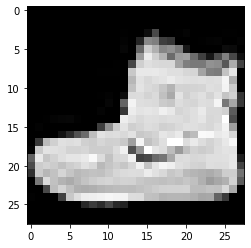

In [6]:
plt.imshow(image.squeeze(), cmap='gray')

In [7]:
train_set.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [8]:
in_features = image.numel()
in_features

784

In [9]:
out_features = math.floor(in_features / 2 )
out_features

392

In [11]:
out_classes = len(train_set.classes)
out_classes

10

In [21]:
network1 = nn.Sequential(
    nn.Flatten(start_dim = 1),
    nn.Linear(in_features, out_features),
    nn.Linear(out_features, out_classes)
)
network1

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=392, bias=True)
  (2): Linear(in_features=392, out_features=10, bias=True)
)

In [17]:
image = image.unsqueeze(0)
image.shape

torch.Size([1, 1, 1, 1, 28, 28])

In [18]:
network1(image)

tensor([[ 0.0571,  0.3190,  0.4470,  0.0199,  0.0268,  0.0829, -0.2635, -0.3096,
          0.2875, -0.1070]], grad_fn=<AddmmBackward0>)

In [20]:
layers = OrderedDict([
      ('flat', nn.Flatten(start_dim = 1)),
      ('hidden', nn.Linear(in_features, out_features)),
      ('output', nn.Linear(out_features, out_classes))
])

network2 = nn.Sequential(layers)
network2

Sequential(
  (flat): Flatten(start_dim=1, end_dim=-1)
  (hidden): Linear(in_features=784, out_features=392, bias=True)
  (output): Linear(in_features=392, out_features=10, bias=True)
)

In [22]:
network2(image)

tensor([[ 0.0496, -0.2840, -0.0832, -0.0666,  0.0755,  0.1033, -0.0514,  0.1386,
          0.0804,  0.1931]], grad_fn=<AddmmBackward0>)

In [30]:
torch.manual_seed(50)
network1 = nn.Sequential(
    nn.Flatten(start_dim = 1),
    nn.Linear(in_features, out_features),
    nn.Linear(out_features, out_classes)
)

torch.manual_seed(50)
layers = OrderedDict([
      ('flat', nn.Flatten(start_dim = 1)),
      ('hidden', nn.Linear(in_features, out_features)),
      ('output', nn.Linear(out_features, out_classes))
])
network2 = nn.Sequential(layers)
# Adding a seed makes sure that the wegihts in both the layers are initialized to the same values 

In [31]:
network1(image), network2(image)

(tensor([[ 0.1681,  0.1028, -0.0790, -0.0659, -0.2436,  0.1328, -0.0864,  0.0016,
           0.1819, -0.0168]], grad_fn=<AddmmBackward0>),
 tensor([[ 0.1681,  0.1028, -0.0790, -0.0659, -0.2436,  0.1328, -0.0864,  0.0016,
           0.1819, -0.0168]], grad_fn=<AddmmBackward0>))

In [32]:
torch.manual_seed(50)
network3 = nn.Sequential()
network3.add_module('flat', nn.Flatten(start_dim = 1))
network3.add_module('hidden', nn.Linear(in_features, out_features))
network3.add_module('output', nn.Linear(out_features, out_classes))
network3

Sequential(
  (flat): Flatten(start_dim=1, end_dim=-1)
  (hidden): Linear(in_features=784, out_features=392, bias=True)
  (output): Linear(in_features=392, out_features=10, bias=True)
)

In [33]:
network3(image)

tensor([[ 0.1681,  0.1028, -0.0790, -0.0659, -0.2436,  0.1328, -0.0864,  0.0016,
          0.1819, -0.0168]], grad_fn=<AddmmBackward0>)

#### BatchNorm

In [ ]:
# without the BatchNorm
torch.manual_seed(50)
network1 = nn.Sequential(
      nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
    , nn.ReLU()
    , nn.MaxPool2d(kernel_size=2, stride=2)
    , nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
    , nn.ReLU()
    , nn.MaxPool2d(kernel_size=2, stride=2)
    , nn.Flatten(start_dim=1)  
    , nn.Linear(in_features=12*4*4, out_features=120)
    , nn.ReLU()
    , nn.Linear(in_features=120, out_features=60)
    , nn.ReLU()
    , nn.Linear(in_features=60, out_features=10)
)

In [ ]:
# with BatchNorm
torch.manual_seed(50)
network2 = nn.Sequential(
      nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
    , nn.ReLU()
    , nn.MaxPool2d(kernel_size=2, stride=2)
    
    # observe the BatchNorm layer
    # This is a 2d BatchNorm layer
    , nn.BatchNorm2d(6)

    , nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
    , nn.ReLU()
    , nn.MaxPool2d(kernel_size=2, stride=2)
    , nn.Flatten(start_dim=1)  
    , nn.Linear(in_features=12*4*4, out_features=120)
    , nn.ReLU()
    
    # observe the BatchNorm layer
    # This is a 1d BatchNorm layer
    , nn.BatchNorm1d(120)

    , nn.Linear(in_features=120, out_features=60)
    , nn.ReLU()
    , nn.Linear(in_features=60, out_features=10)
)